The purpose of this program is to design a controller such that the bar can be oriented at a desired angle

In [1]:
%pylab inline
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
import math
import matplotlib.patches as patches

Populating the interactive namespace from numpy and matplotlib


# Eulers Integration

In [2]:
def simulate(Δt,z,u):
    z = z + Δt*u
    return z

# Control Policy

Euler and newtons equations were used to fine the force needed to move the rigid rod (tau = arm X force and tau = inertia Matrix X angular acceleration)

In [3]:
def control(t,z,theta_ref,kp_kd,l,g,dz):
    error = theta_ref-z
    u = kp_kd[0]*error[0] + kp_kd[1]*error[1] + (6*g)/l
    dz[0] = z[1]
    dz[1] = u/1-g
    return dz

# Running the Simulator

In [6]:
tf=10
Δt = 0.1  #Time Step
time = np.linspace(0.,tf,int(tf/Δt+1))

#Initial Conditions
z = np.array([0.,0.])
z_log = [np.copy(z)]
dz = np.array([0.,0.])
theta_ref = np.array([(3*math.pi)/4,0.])
kp_kd = np.array([10.,3.])
l = 6
g = 9.8    

for t in time[1:]:
    contrl = control(t,z,theta_ref,kp_kd,l,g,dz)
    #print(contrl)
    z = simulate(Δt,z,contrl)
    #print(sim)
    z_log.append(np.copy(z))
z_log = np.array(z_log)

print(len(z_log))


101


# Plotting

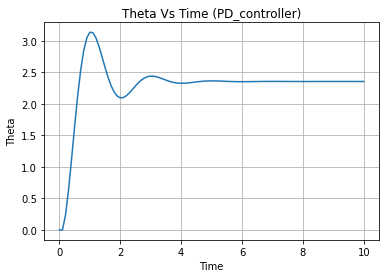

In [7]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(time,z_log[:,0])
plt.grid()
#print(z_log[:,1])
ax1.set_xlabel('Time')
ax1.set_ylabel('Theta')
ax1.set_title('Theta Vs Time (PD_controller)')
plt.show()

In [8]:
pos_x1 = np.zeros(len(z_log))
pos_y1 = np.zeros(len(z_log))

Finding the x and y values using the rotation matrix

In [9]:
for a in range(len(z_log)):
    pos_x1[a] = 6*math.cos(z_log[a,0]) - 0*math.sin(z_log[a,0])
    pos_y1[a] = 0*math.cos(z_log[a,0]) + 6*math.sin(z_log[a,0])

theta = z_log[:,0]

# Animation

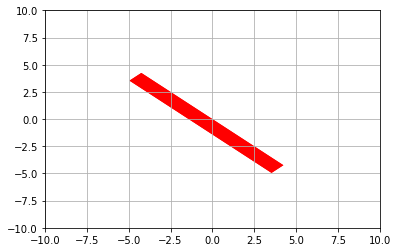

In [11]:
fig, ax = plt.subplots()
plt.grid()
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

patch = patches.Rectangle((0,0),0,0,fc='r')

def init():
    ax.add_patch(patch)
    return patch,

def animate(i):
    patch.set_width(-12)
    patch.set_height(1)
    patch.set_xy([pos_x1[i], pos_y1[i]])
    patch.angle = np.rad2deg(theta[i])
    return patch,

anim = animation.FuncAnimation(fig, animate,init_func=init,frames=len(time),interval=120,blit=True)

HTML(anim.to_jshtml())